# Project 2

# Used Vehicle Price Prediction

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

In [2]:
 data = pd.read_csv('../dataset/dataTrain_carListings.zip')

In [3]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [4]:
data.shape

(500000, 6)

In [5]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

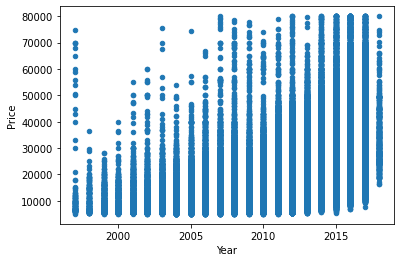

In [6]:
data.plot(kind='scatter', y='Price', x='Year')

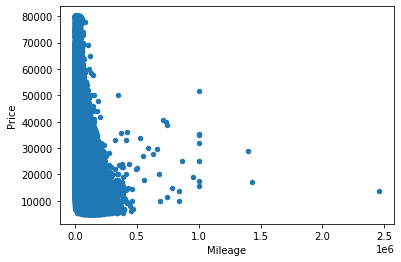

In [7]:
data.plot(kind='scatter', y='Price', x='Mileage')

In [8]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

# Exercise P2.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the model using K-Fold (K=10) cross-validation
- 25% - Notebook explaining the modeling process


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [25]:
import math
import random

In [11]:
data = pd.read_csv('../dataset/dataTrain_carListings.zip')
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [12]:
y = data['Price'] 
X = data.drop(['Price'], axis=1)
X = pd.get_dummies(X)

In [13]:
X.head()

,Year,Mileage,State_ AK,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DC,...,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr
0,2014,31909,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016,25741,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,24633,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,84026,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,22816,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
X_ = PCA(n_components=8).fit_transform(X)

In [77]:
def ManualCrossValidation(model , kfold = 10):
    accuracy_scores = []
    
    for i in range(kfold):
        random_state = math.trunc((random.random() * 1000))
        X_foldtrain, X_foldtest, y_foldtrain, y_foldtest = train_test_split(X_, y, test_size=0.3, random_state=random_state)
        
        model.fit(X_foldtrain, y_foldtrain)
        y_pred_clf = model.predict(X_foldtest)
        error = mean_squared_error(y_foldtest, y_pred_clf) ** 0.5
        accuracy_scores.append(error)
        
    for i in range(len(accuracy_scores)):
        error = accuracy_scores[i] + error
    error = error / len(accuracy_scores)

    return error


In [58]:
# #Validación de la función
# Modelo = RandomForestRegressor(n_estimators=1, random_state=1, n_jobs=-1)
# RMSE = ManualCrossValidation(Modelo)
# RMSE

8862.731812860298

In [80]:
estimator_range = range(1, 400, 50)

# list to store the average Accuracy for each value of n_estimators
rmse_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    Modelo = RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=-1)
    rmse_scores.append((ManualCrossValidation(Modelo)).mean())
    

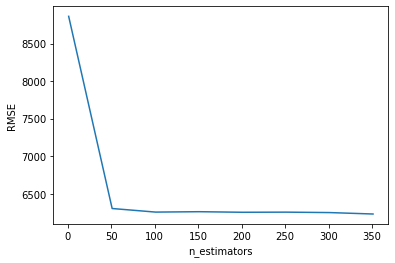

In [81]:
plt.plot(estimator_range , rmse_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE');

In [86]:
estimator_depth = range(1, 200, 50)

# list to store the average Accuracy for each value of n_estimators
rmse_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for depth in estimator_depth:
    Modelo = RandomForestRegressor(n_estimators=100, max_depth=depth, random_state=1, n_jobs=-1)
    rmse_scores.append((ManualCrossValidation(Modelo)).mean())

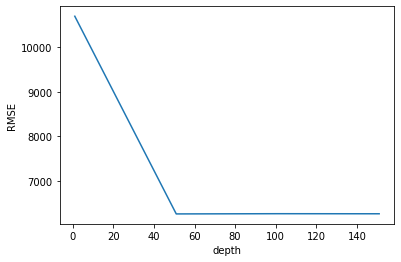

In [89]:
plt.plot(estimator_depth , rmse_scores)
plt.xlabel('depth')
plt.ylabel('RMSE');

In [92]:
min_Accuracy = np.min(rmse_scores) 
min_Accuracy

6260.637449573321

#### La mejor estimación se da con 100 estimadores, con 50 en la profunidad depth y corresponde a un RMSE 6260.637

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.3, random_state=random_state)

clf = RandomForestRegressor(n_estimators=100,max_depth=50, random_state=1, n_jobs=-1)
clf.fit(X_train, y_train)
    

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [98]:
y_pred_clf = clf.predict(X_test)

In [100]:
error = mean_squared_error(y_test, y_pred_clf) ** 0.5
print('RMSE: %.3f' % error)

RMSE: 5692.070
